In [1]:
import os

# Change the current working directory to the D drive
os.chdir("D:/Applied ML/Assignment 2/data")

In [6]:
%cd ..

D:\Applied ML\Assignment 2


In [7]:
%cd src

D:\Applied ML\Assignment 2\src


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import regex as re
import numpy as np
import os, sys, random
import nltk
from collections import Counter
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import wordnet 
import string
from nltk.corpus import stopwords
from contractions import fix


stop_words=set(stopwords.words('english'))

In [14]:
raw_data = pd.read_csv("../data/emails.csv", skiprows=[0], names=["text", "spam"])

In [15]:
raw_data.to_csv('../data/raw_data.csv', index=False)

In [20]:
mails = pd.read_csv("../data/raw_data.csv")
print(mails)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


In [21]:
mails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [22]:
mails.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [23]:
mails['length'] = mails['text'].map(lambda text: len(text))

In [24]:
mails.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


<AxesSubplot: ylabel='Frequency'>

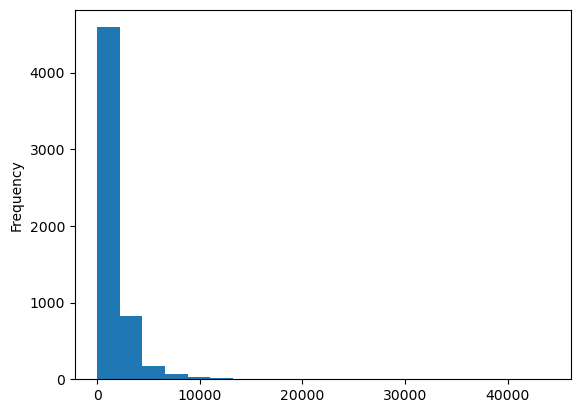

In [25]:
mails.length.plot(bins=20, kind='hist')

In [26]:
mails.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [27]:
# Splitting the mails in tokens
def split_into_tokens(data):
    tokenized_words = []
    regex=r"\w+"
    
    for i in range(len(data.text)):
        tokenized_words.append(re.findall(regex, data.text[i]))
        
    return tokenized_words

In [28]:
#Function to perform lematization and stopword removal
def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    
    for i in range(len(data)):
        temp = []

        for j in range(len(data[i])):
        
            if data[i][j].lower() in stop_words:
                continue
            
            elif data[i][j] in string.punctuation:
                continue
            
            else:
                temp.append(str(lemmatizer.lemmatize(data[i][j]).lower()))

        lemmatized_words.append(temp)             

    return lemmatized_words

In [29]:
token_words = split_into_tokens(mails)
processed_words = lemmatize(token_words)

mails['processed_mails'] = processed_words

In [30]:
mails.head()

,text,spam,length,processed_mails
0,Subject: naturally irresistible your corporate...,1,1484,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,598,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,448,"[subject, unbelievable, new, home, made, easy,..."
3,Subject: 4 color printing special request add...,1,500,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,235,"[subject, money, get, software, cd, software, ..."


In [31]:
#Train-validation and test split
train_test_split_size = 0.1
X_train_val, X_test, y_train_val, y_test = train_test_split(mails.processed_mails, mails.spam, test_size = train_test_split_size, random_state = 42)

In [32]:
#Train and Validation split
train_val_split_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = train_val_split_size, random_state = 42)

In [33]:
#Creating the splitted dataframes
train_df = pd.DataFrame({'X_train': X_train,'y_train': y_train})
val_df = pd.DataFrame({'X_val': X_val,'y_val': y_val})
test_df = pd.DataFrame({'X_test': X_test,'y_test': y_test})

In [34]:
train_df.to_csv('../data/train.csv',index = False)
val_df.to_csv('../data/validation.csv',index = False)
test_df.to_csv('../data/test.csv',index = False)
#mails.to_csv('./data/modified_df.csv',index = False)

In [36]:
%cd ..

D:\Applied ML\Assignment 2


In [37]:
%%bash
git init
dvc init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>


Initialized empty Git repository in /mnt/d/Applied ML/Assignment 2/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [38]:
%%bash
dvc remote add -d storage gdrive://1nYGTAAtlc-8kY9zvsIrfvGB0OK_pcsbx

Setting 'storage' as a default remote.


In [39]:
%%bash
git commit .dvc/config -m "Configure remote storage"

[master (root-commit) 091ca56] Configure remote storage
 1 file changed, 4 insertions(+)
 create mode 100644 .dvc/config


In [40]:
%cd data

D:\Applied ML\Assignment 2\data


In [41]:
%%bash
dvc add raw_data.csv


To track the changes with git, run:

	git add raw_data.csv.dvc .gitignore

To enable auto staging, run:

	dvc config core.autostage true


In [42]:
%%bash
dvc add train.csv validation.csv test.csv


To track the changes with git, run:

	git add validation.csv.dvc .gitignore test.csv.dvc train.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


In [46]:
%%bash
dvc config core.autostage true

In [43]:
%%bash
dvc push

4 files pushed


In [44]:
%%bash
git add raw_data.csv.dvc train.csv.dvc validation.csv.dvc test.csv.dvc .gitignore

In [45]:
%%bash
git commit -m "Track data with DVC"

[master 9c0ee62] Track data with DVC
 8 files changed, 34 insertions(+)
 create mode 100755 .dvc/.gitignore
 mode change 100644 => 100755 .dvc/config
 create mode 100755 .dvcignore
 create mode 100644 data/.gitignore
 create mode 100644 data/raw_data.csv.dvc
 create mode 100644 data/test.csv.dvc
 create mode 100644 data/train.csv.dvc
 create mode 100644 data/validation.csv.dvc


In [47]:
%cd ../src

D:\Applied ML\Assignment 2\src


In [48]:
##### Different seed 
#Train-validation and test split
train_test_split_size = 0.1
X_train_val, X_test, y_train_val, y_test = train_test_split(mails.processed_mails, mails.spam, test_size = train_test_split_size, random_state = 69)

#Train and Validation split
train_val_split_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = train_val_split_size, random_state = 69)

#Creating the splitted dataframes
train_df = pd.DataFrame({'X_train': X_train,'y_train': y_train})
val_df = pd.DataFrame({'X_val': X_val,'y_val': y_val})
test_df = pd.DataFrame({'X_test': X_test,'y_test': y_test})

train_df.to_csv('../data/train.csv',index = False)
val_df.to_csv('../data/validation.csv',index = False)
test_df.to_csv('../data/test.csv',index = False)
#mails.to_csv('./data/modified_df.csv',index = False)

In [49]:
%cd ../data

D:\Applied ML\Assignment 2\data


In [50]:
%%bash
dvc add train.csv validation.csv test.csv

In [51]:
%%bash
git add train.csv.dvc validation.csv.dvc test.csv.dvc

In [52]:
%%bash
git commit -m "data splits with new random seed"

[master 0638263] data splits with new random seed
 3 files changed, 6 insertions(+), 6 deletions(-)
 mode change 100644 => 100755 data/test.csv.dvc
 mode change 100644 => 100755 data/train.csv.dvc
 mode change 100644 => 100755 data/validation.csv.dvc


In [53]:
%%bash
dvc push

3 files pushed


In [55]:
%%bash
git log --oneline

0638263 data splits with new random seed
9c0ee62 Track data with DVC
091ca56 Configure remote storage


### Reverting back previos version

In [56]:
%cd ../data

D:\Applied ML\Assignment 2\data


In [57]:
%%bash
git checkout 9c0ee62 train.csv.dvc validation.csv.dvc test.csv.dvc

Updated 3 paths from 65a3443


In [58]:
%%bash
dvc checkout

M       raw_data.csv
M       test.csv
M       validation.csv
M       train.csv


Index(['X_train', 'y_train'], dtype='object')
Distribution in train.csv: 
0    3524
1    1115
Name: y_train, dtype: int64



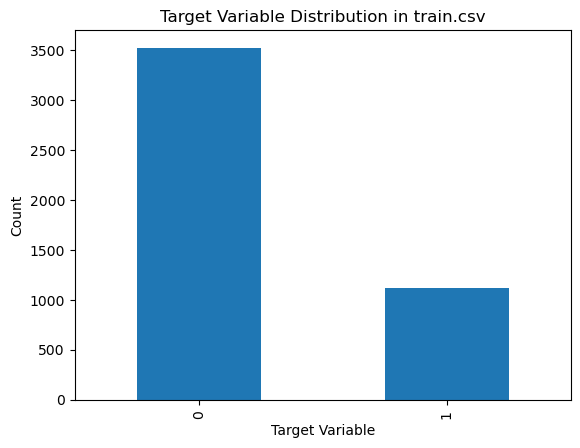

Index(['X_val', 'y_val'], dtype='object')
Distribution in validation.csv: 
0    411
1    105
Name: y_val, dtype: int64



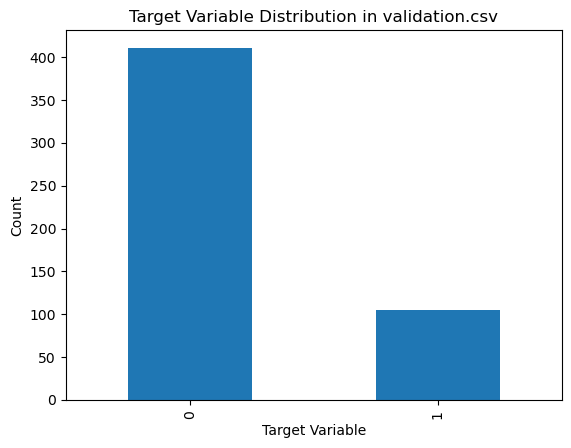

Index(['X_test', 'y_test'], dtype='object')
Distribution in test.csv: 
0    425
1    148
Name: y_test, dtype: int64



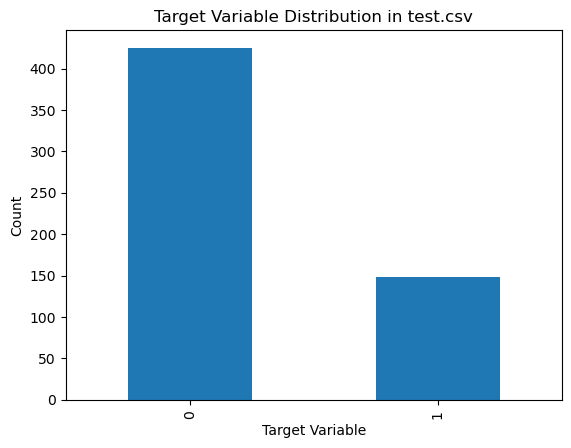

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

for split in ['train', 'validation', 'test']:
    df = pd.read_csv(f'../data/{split}.csv')
    print(df.columns)
    distribution = df['y_train' if split == 'train' else 'y_val' if split == 'validation' else 'y_test'].value_counts()
    print(f"Distribution in {split}.csv: \n{distribution}\n")

    # Plotting distribution
    distribution.plot(kind='bar')
    plt.title(f"Target Variable Distribution in {split}.csv")
    plt.xlabel("Target Variable")
    plt.ylabel("Count")
    plt.show()


### Updated Version

In [65]:
%%bash
git checkout 0638263 train.csv.dvc validation.csv.dvc test.csv.dvc

Updated 3 paths from 1ba27e2


In [66]:
%%bash
dvc checkout

M       test.csv
M       validation.csv
M       train.csv
M       raw_data.csv


In [69]:
%cd ../src

D:\Applied ML\Assignment 2\src


Index(['X_train', 'y_train'], dtype='object')
Distribution in train.csv: 
0    3530
1    1109
Name: y_train, dtype: int64



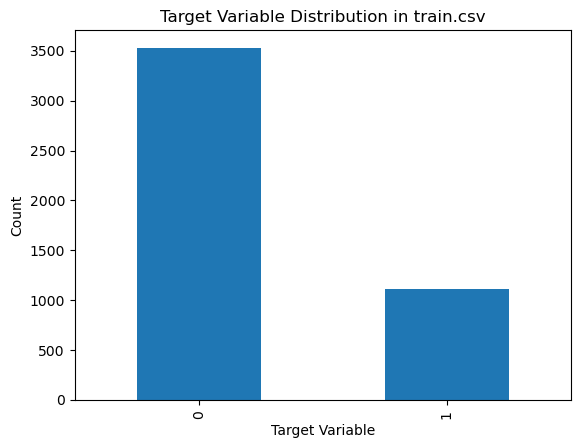

Index(['X_val', 'y_val'], dtype='object')
Distribution in validation.csv: 
0    394
1    122
Name: y_val, dtype: int64



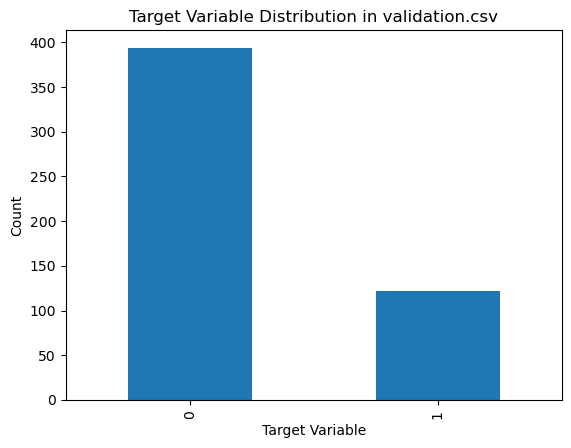

Index(['X_test', 'y_test'], dtype='object')
Distribution in test.csv: 
0    436
1    137
Name: y_test, dtype: int64



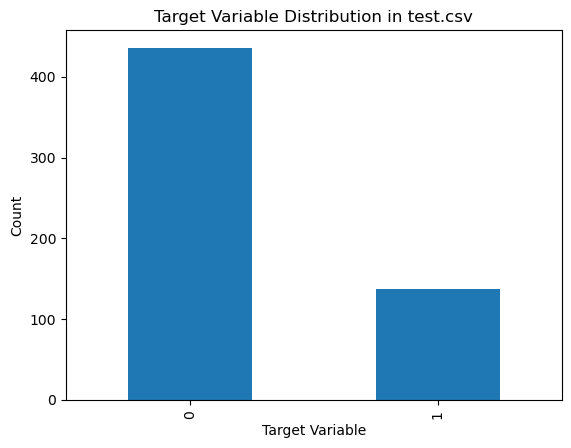

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

for split in ['train', 'validation', 'test']:
    df = pd.read_csv(f'../data/{split}.csv')
    print(df.columns)
    distribution = df['y_train' if split == 'train' else 'y_val' if split == 'validation' else 'y_test'].value_counts()
    print(f"Distribution in {split}.csv: \n{distribution}\n")

    # Plotting distribution
    distribution.plot(kind='bar')
    plt.title(f"Target Variable Distribution in {split}.csv")
    plt.xlabel("Target Variable")
    plt.ylabel("Count")
    plt.show()